# CAO Points Notebook

## How to load CAO points into pandas
***
[CAO website](http://www.cao.ie/)

PLACEHOLDER CONTENT - ADD EXPLANATION

### Importing packages
***

In [1]:
#Download Excel spreadsheeet
import urllib.request as urlrq

#PDF table extraction
import camelot

#Handle ZIP files
import zipfile

#Date and time for file names
import datetime as dt

#Arrays
import numpy as np

#Dataframes
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Saving and backing-up files
***

In [2]:
# Current date and time
now = dt.datetime.now()

# Format as string
nowstr = now.strftime('%Y%m%d_%H%M%S')

## CAO 2021
***

### Data source
http://www.cao.ie/index.php?page=points&p=2021

In [3]:
#Original file
url2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

### Save original file

In [4]:
# Create a file path for the original data
pathxlsx2021 = 'data/2021/cao2021_original_' + nowstr + '.xlsx'

urlrq.urlretrieve(url2021, pathxlsx2021)


('data/2021/cao2021_original_20211219_135310.xlsx',
 <http.client.HTTPMessage at 0x1566d710bb0>)

### Load data with pandas

In [5]:
# Download and parse the excel spreadsheet.
df2021 = pd.read_excel(url2021, skiprows=11)

In [6]:
df2021.head()

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN


In [7]:
#Spotcheck
#Courses start from line 13 in the original dataset
df2021.iloc[690]

CATEGORY (ISCED Description)                      Arts
Course Title                       Economics/Geography
Course Code                                      TR198
R1 Points                                          968
R1 Random                                          NaN
R2 Points                                          956
R2 Random                                          NaN
EOS Points                                         954
EOS Random                                         NaN
EOS Midpoints                                      NaN
Course Level                                         8
HEI                             Trinity College Dublin
Test/Interview                                     NaN
AVP                                                NaN
v                                                  NaN
Name: 690, dtype: object

In [8]:
#Spotcheck last row
df2021.iloc[-1]

CATEGORY (ISCED Description)          Business and administration
Course Title                         Business Information Systems
Course Code                                                 WD232
R1 Points                                                     261
R1 Random                                                     NaN
R2 Points                                                     261
R2 Random                                                     NaN
EOS Points                                                    261
EOS Random                                                    NaN
EOS Midpoints                                                 329
Course Level                                                    8
HEI                             Waterford Institute of Technology
Test/Interview                                                NaN
AVP                                                           avp
v                                                             NaN
Name: 1450

### Cleaning up dataframe

In [9]:
#Remove space from Course Level header
df2021_l8 = df2021.rename(columns={'Course Level': 'level'})

#Select only level 8 courses
df2021_l8 = df2021_l8[df2021_l8.level == 8]
df2021_l8.head()

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,level,HEI,Test/Interview,AVP,v
29,Information and Communication Technologies (ICTs),Software Design for Virtual Reality and Gaming,AL801,300,NaN,NaN,NaN,300,NaN,359,8,Athlone Institute of Technology,NaN,NaN,NaN
30,Information and Communication Technologies (ICTs),Software Design in Artificial Intelligence for...,AL802,313,NaN,NaN,NaN,313,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
31,Information and Communication Technologies (ICTs),Software Design for Mobile Apps and Connected ...,AL803,350,NaN,NaN,NaN,350,NaN,398,8,Athlone Institute of Technology,NaN,NaN,NaN
32,Information and Communication Technologies (ICTs),Computer Engineering for Network Infrastructure,AL805,321,NaN,NaN,NaN,321,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
33,Architecture and construction,Quantity Surveying,AL810,328,NaN,NaN,NaN,328,NaN,377,8,Athlone Institute of Technology,NaN,NaN,NaN


In [10]:
#Select only relevant columns and reorder
#These are columns common to all 3 years
df2021 = df2021_l8[['Course Code','Course Title', 'EOS Points', 'EOS Midpoints', 'Test/Interview']]

#Change headers
df2021.columns = ['code', 'course name', 'EOS', 'Mid','test']

#Replace AQA values with 0
df2021 = df2021.replace('AQA',0)

In [11]:
df2021.head()

,code,course name,EOS,Mid,test
29,AL801,Software Design for Virtual Reality and Gaming,300,359,NaN
30,AL802,Software Design in Artificial Intelligence for...,313,381,NaN
31,AL803,Software Design for Mobile Apps and Connected ...,350,398,NaN
32,AL805,Computer Engineering for Network Infrastructure,321,381,NaN
33,AL810,Quantity Surveying,328,377,NaN


In [12]:
#If value in EOS column is '#', modify value in 'test' column
#This is because some of the '#' were misplaced in the original dataset
df2021.loc[df2021.EOS == '#', 'test'] = '#'
df2021.head()

,code,course name,EOS,Mid,test
29,AL801,Software Design for Virtual Reality and Gaming,300,359,NaN
30,AL802,Software Design in Artificial Intelligence for...,313,381,NaN
31,AL803,Software Design for Mobile Apps and Connected ...,350,398,NaN
32,AL805,Computer Engineering for Network Infrastructure,321,381,NaN
33,AL810,Quantity Surveying,328,377,NaN


In [13]:
#Spotcheck known value
df2021.loc[786]

code                                  DN411
course name    Radiography - Graduate Entry
EOS                                       #
Mid                                     NaN
test                                      #
Name: 786, dtype: object

In [14]:
#Now we replace the '#' values on numerical columns with zeros
df2021[['EOS','Mid']] = df2021[['EOS','Mid']].replace('#',0).fillna(0)
df2021.head()

,code,course name,EOS,Mid,test
29,AL801,Software Design for Virtual Reality and Gaming,300.0,359.0,NaN
30,AL802,Software Design in Artificial Intelligence for...,313.0,381.0,NaN
31,AL803,Software Design for Mobile Apps and Connected ...,350.0,398.0,NaN
32,AL805,Computer Engineering for Network Infrastructure,321.0,381.0,NaN
33,AL810,Quantity Surveying,328.0,377.0,NaN


In [15]:
#Check if all points are numericals
df2021[['EOS','Mid']].dtypes

EOS    float64
Mid    float64
dtype: object

In [16]:
#Replace NaN values in column test with 'no', and '#' values with string 'yes'
df2021['test'] = df2021['test'].replace('#','yes').fillna('no')
df2021.head()

,code,course name,EOS,Mid,test
29,AL801,Software Design for Virtual Reality and Gaming,300.0,359.0,no
30,AL802,Software Design in Artificial Intelligence for...,313.0,381.0,no
31,AL803,Software Design for Mobile Apps and Connected ...,350.0,398.0,no
32,AL805,Computer Engineering for Network Infrastructure,321.0,381.0,no
33,AL810,Quantity Surveying,328.0,377.0,no


In [17]:
# File path for csv dataset
path2021 = 'data/2021/cao2021_' + nowstr + '.csv'

In [18]:
# Save pandas dataframe
df2021.to_csv(path2021)

## CAO 2020
***

### Data source
https://www.cao.ie/index.php?page=points&p=2020

In [19]:
#Original file
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

### Save original file

In [20]:
#Repeat steps from CAO 2021
pathxlsx2020 = 'data/2020/cao2020_original_' + nowstr + '.xlsx'
urlrq.urlretrieve(url2020, pathxlsx2020)

('data/2020/cao2020_original_20211219_135310.xlsx',
 <http.client.HTTPMessage at 0x1566dd73e80>)

### Load data with pandas

In [21]:
df2020 = pd.read_excel(url2020, skiprows=10)
df2020.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning up dataframe

In [22]:
#Repeat steps from 2021 dataframe

#Select only L8 courses
df2020_l8 = df2020[df2020.LEVEL == 8]
df2020_l8.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Change headers
df2020 = df2020_l8[['COURSE CODE2','COURSE TITLE', 'EOS', 'EOS Mid-point', 'Test/Interview #']]
df2020.columns = ['code', 'course name', 'EOS', 'Mid', 'test']
df2020.head()

,code,course name,EOS,Mid,test
0,AC120,International Business,209,280,NaN
1,AC137,Liberal Arts,252,270,NaN
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#


**NB:** 'test' column was fine in the original dataset, so we just need to remove nun-numerical values from columns with points.

In [24]:
#Replace non-numerical values with 0 for selected columns
df2020[['EOS','Mid']] = df2020[['EOS','Mid']].replace(['#','#+matric','AQA'],0).fillna(0)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
df2020.head()

,code,course name,EOS,Mid,test
0,AC120,International Business,209,280.0,NaN
1,AC137,Liberal Arts,252,270.0,NaN
2,AD101,"First Year Art & Design (Common Entry,portfolio)",0,0.0,#
3,AD102,Graphic Design and Moving Image Design (portfo...,0,0.0,#
4,AD103,Textile & Surface Design and Jewellery & Objec...,0,0.0,#


**NB:** Some values in the EOS column have the '#' character in front of the number, so we need to remove that too.

In [26]:
#Use regex to remove particular character instead of matching whole value
df2020.EOS = df2020.EOS.replace('#','', regex=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
df2020.head()

,code,course name,EOS,Mid,test
0,AC120,International Business,209,280.0,NaN
1,AC137,Liberal Arts,252,270.0,NaN
2,AD101,"First Year Art & Design (Common Entry,portfolio)",0,0.0,#
3,AD102,Graphic Design and Moving Image Design (portfo...,0,0.0,#
4,AD103,Textile & Surface Design and Jewellery & Objec...,0,0.0,#


In [28]:
df2020.loc[1158]

code                        TR311
course name    Film/Drama Studies
EOS                           521
Mid                         557.0
test                            #
Name: 1158, dtype: object

In [29]:
#Change dtype of column EOS to float
df2020 = df2020.astype({'EOS': float})

In [30]:
df2020.head()

,code,course name,EOS,Mid,test
0,AC120,International Business,209.0,280.0,NaN
1,AC137,Liberal Arts,252.0,270.0,NaN
2,AD101,"First Year Art & Design (Common Entry,portfolio)",0.0,0.0,#
3,AD102,Graphic Design and Moving Image Design (portfo...,0.0,0.0,#
4,AD103,Textile & Surface Design and Jewellery & Objec...,0.0,0.0,#


In [31]:
#Replace NaN values in column test with 'no', and '#' values with string 'yes'
df2020['test'] = df2020['test'].replace('#','yes').fillna('no')
df2020.head()

,code,course name,EOS,Mid,test
0,AC120,International Business,209.0,280.0,no
1,AC137,Liberal Arts,252.0,270.0,no
2,AD101,"First Year Art & Design (Common Entry,portfolio)",0.0,0.0,yes
3,AD102,Graphic Design and Moving Image Design (portfo...,0.0,0.0,yes
4,AD103,Textile & Surface Design and Jewellery & Objec...,0.0,0.0,yes


In [32]:
#Save as csv
path2020 = 'data/2020/cao2020_' + nowstr + '.csv'
df2020.to_csv(path2020)

## CAO 2019
***

### Data source
https://www.cao.ie/index.php?page=points&p=2019

In [33]:
#Original file
url2019 = 'http://www2.cao.ie/points/lvl8_19.pdf'

In [34]:
#Repeat steps from CAO 2021
pathpdf2019 = 'data/2019/cao2019_original_' + nowstr + '.pdf'
urlrq.urlretrieve(url2019, pathpdf2019)

('data/2019/cao2019_original_20211219_135310.pdf',
 <http.client.HTTPMessage at 0x1566df2e790>)

In [35]:
#Extract PDF table with multiple pages
#Camelot creates 1 table per PDF page
tables = camelot.read_pdf('http://www2.cao.ie/points/lvl8_19.pdf', pages = '1-end')

#Check number of tables in the list
tables

<TableList n=18>

In [36]:
#Get a parsing report for the first and last pages
tables[0].parsing_report

{'accuracy': 99.61, 'whitespace': 3.98, 'order': 1, 'page': 1}

In [37]:
tables[-1].parsing_report

{'accuracy': 100.0, 'whitespace': 2.38, 'order': 1, 'page': 18}

In [38]:
#Concat multiple tables in a single dataframe

empty_list = []
for t in range(tables.n):
    data = tables[t].df
    
    empty_list.append(data)
    df2019 = pd.concat(empty_list, ignore_index=False, sort=False)
    

### Cleaning up dataframe

**NB:** The original dataset had only 4 columns, and missed one specifically to deal with courses that required Tests/Interviews. This was indicated with a '#' character in the EOS column values - in some cases, with the '#' character preceding the actual points. Where this happens, we should move this information to a separate column and only keep numerical values for points.<br>
Also, the '\*' character denoted courses where not all on the point score were offered places. We won't need this information for our analysis and will remove this character from our dataframe.<br>

In [39]:
#Add new column to store courses with Test/Interview
df2019.insert(4, 'test','')

#Headers are blank, so we first change them
df2019.columns = ['code','course name', 'EOS', 'Mid','test']

In [40]:
#Restart index
df2019 = df2019.reset_index(drop=True)
df2019.head()

,code,course name,EOS,Mid,test
0,Course Code INSTITUTION and COURSE,,EOS,Mid,
1,,Athlone Institute of Technology,,,
2,AL801,Software Design with Virtual Reality and Gaming,304,328,
3,AL802,Software Design with Cloud Computing,301,306,
4,AL803,Software Design with Mobile Apps and Connected...,309,337,


In [41]:
#If no value in column 'code', remove row
#Also, remove first row with messed up headers
df2019 = df2019[df2019.code != ''].drop(labels=[0], axis=0)

In [42]:
df2019.head()

,code,course name,EOS,Mid,test
2,AL801,Software Design with Virtual Reality and Gaming,304,328,
3,AL802,Software Design with Cloud Computing,301,306,
4,AL803,Software Design with Mobile Apps and Connected...,309,337,
5,AL805,Network Management and Cloud Infrastructure,329,442,
6,AL810,Quantity Surveying,307,349,


In [43]:
#Camelot read some empty values as empty strings
#We replace these with 0 for points columns
df2019[['EOS','Mid']] = df2019[['EOS','Mid']].replace('',0).fillna(0)

In [44]:
#Test one to check if it worked
df2019.loc[440]

code                   AD217
course name     Illustration
EOS            # +matric 625
Mid                        0
test                        
Name: 440, dtype: object

In [45]:
#Remove '*' characters
df2019 = df2019.replace('\*','', regex=True)

In [46]:
#Check a known value
df2019.loc[130]

code              CK201
course name    Commerce
EOS                 465
Mid                 489
test                   
Name: 130, dtype: object

In [47]:
#Replace the expression '#\+matric ' with '#'
#They seem to refer to the same thing
df2019 = df2019.replace('# \+matric ','#', regex=True)

In [48]:
#Test known value
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                    #625
Mid                       0
test                       
Name: 440, dtype: object

In [49]:
#If '#' values in EOS column, add it to test column
df2019.loc[df2019.EOS == '#', 'test'] = '#'

In [50]:
#Test known value
df2019.loc[925]

code                                                       TL889
course name    Counselling with Addiction - Mature applicants...
EOS                                                            #
Mid                                                            0
test                                                           #
Name: 925, dtype: object

In [51]:
#Replace '#' values from EOS column with 0
df2019['EOS'] = df2019['EOS'].replace('#',0)

In [52]:
df2019.loc[925]

code                                                       TL889
course name    Counselling with Addiction - Mature applicants...
EOS                                                            0
Mid                                                            0
test                                                           #
Name: 925, dtype: object

In [53]:
#Move remaining '#' characters in EOS column to test column
df2019.loc[df2019['EOS'].str.contains('#', na=False), 'test'] = '#'
df2019['EOS'] = df2019['EOS'].str.replace('#', '')

In [54]:
#Check known value
df2019.loc[783]

code                                         LM026
course name    Performing Arts (audition required)
EOS                                            307
Mid                                            367
test                                             #
Name: 783, dtype: object

**NB:** In the original dataset, '\ +matric' values were in the EOS column and Mid points were provided in the Mid column for rows 432-438, 440 and 441. Camelot read it wrongly and put what was supposed to be in the Mid column in the EOS column.

In [55]:
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                     625
Mid                       0
test                      #
Name: 440, dtype: object

In [56]:
#Swap values between columns for selected rows
df2019.loc[[432,433,434,435,436,437,438,440,441],['EOS','Mid']] = df2019.loc[[432,433,434,435,436,437,438,440,441],['Mid','EOS']].values

In [57]:
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                       0
Mid                     625
test                      #
Name: 440, dtype: object

In [58]:
df2019 = df2019.astype({'EOS': float, 'Mid': float})

In [59]:
df2019['Mid'].dtypes

dtype('float64')

In [60]:
#Replace '' values in column test with 'no', and '#' values with string 'yes'
#Eventual NaN values also to be replaced with 'no'
df2019['test'] = df2019['test'].replace(['#',''],['yes','no']).fillna('no')
df2019.head()

,code,course name,EOS,Mid,test
2,AL801,Software Design with Virtual Reality and Gaming,304.0,328.0,no
3,AL802,Software Design with Cloud Computing,301.0,306.0,no
4,AL803,Software Design with Mobile Apps and Connected...,309.0,337.0,no
5,AL805,Network Management and Cloud Infrastructure,329.0,442.0,no
6,AL810,Quantity Surveying,307.0,349.0,no


In [61]:
#Check known value
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                     0.0
Mid                   625.0
test                    yes
Name: 440, dtype: object

In [62]:
pathcsv2019 = 'data/2019/cao2019_' + nowstr + '.csv'

In [63]:
df2019.to_csv(pathcsv2019)

## Consolidating data frames

In [64]:
courses2021 = df2021[['code', 'course name']]
courses2021.head()

,code,course name
29,AL801,Software Design for Virtual Reality and Gaming
30,AL802,Software Design in Artificial Intelligence for...
31,AL803,Software Design for Mobile Apps and Connected ...
32,AL805,Computer Engineering for Network Infrastructure
33,AL810,Quantity Surveying


In [65]:
courses2020 = df2020[['code', 'course name']]
courses2020.head()

,code,course name
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...


In [66]:
courses2019 = df2019[['code', 'course name']]
courses2019.head()

,code,course name
2,AL801,Software Design with Virtual Reality and Gaming
3,AL802,Software Design with Cloud Computing
4,AL803,Software Design with Mobile Apps and Connected...
5,AL805,Network Management and Cloud Infrastructure
6,AL810,Quantity Surveying


In [67]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,course name
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2986,WD200,Arts (options)
2987,WD210,Software Systems Development
2988,WD211,Creative Computing
2989,WD212,Recreation and Sport Management


In [68]:
allcourses.sort_values('code')

,code,course name
1034,AC120,International Business
2229,AC120,International Business
175,AC120,International Business
1035,AC137,Liberal Arts
2230,AC137,Liberal Arts
...,...,...
2990,WD230,Mechanical and Manufacturing Engineering
2060,WD230,Mechanical and Manufacturing Engineering
1031,WD230,Mechanical and Manufacturing Engineering
1032,WD231,Early Childhood Care and Education


In [69]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,course name
1034,AC120,International Business
1035,AC137,Liberal Arts
1037,AD102,Graphic Design and Moving Image Design (portfo...
1040,AD204,Fine Art (portfolio)
1041,AD211,Fashion Design (portfolio)
...,...,...
2986,WD200,Arts (options)
2987,WD210,Software Systems Development
2988,WD211,Creative Computing
2989,WD212,Recreation and Sport Management


In [70]:
# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

,code,course name
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2929,TL801,Animation Visual Effects and Motion Design
2930,TL802,"TV, Radio and New Media"
2931,TL803,Music Technology
2934,TL812,Computing with Digital Media


In [71]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,course name
1034,AC120,International Business
1035,AC137,Liberal Arts
1036,AD101,"First Year Art & Design (Common Entry,portfolio)"
1037,AD102,Graphic Design and Moving Image Design (portfo...
1038,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
2986,WD200,Arts (options)
2987,WD210,Software Systems Development
2988,WD211,Creative Computing
2989,WD212,Recreation and Sport Management


In [72]:
# Returns a copy of the data frame with duplicates removed for column code
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [73]:
allcourses.head()

,code,course name
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying


#### Add points

In [74]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
df2021.columns = ['course name', 'EOS_2021', 'Mid_2021', 'test_2021']

In [75]:
#Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [76]:
allcourses = allcourses.join(df2021[['EOS_2021','Mid_2021','test_2021']])
allcourses.head()

,course name,EOS_2021,Mid_2021,test_2021
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,359.0,no
AL802,Software Design in Artificial Intelligence for...,313.0,381.0,no
AL803,Software Design for Mobile Apps and Connected ...,350.0,398.0,no
AL805,Computer Engineering for Network Infrastructure,321.0,381.0,no
AL810,Quantity Surveying,328.0,377.0,no


In [77]:
df2020_points = df2020[['code','EOS','Mid','test']]
df2020_points.columns = ['code','EOS_2020','Mid_2020','test_2020']
df2020_points.head()

,code,EOS_2020,Mid_2020,test_2020
0,AC120,209.0,280.0,no
1,AC137,252.0,270.0,no
2,AD101,0.0,0.0,yes
3,AD102,0.0,0.0,yes
4,AD103,0.0,0.0,yes


In [78]:
# Set the index to the code column.
df2020_points.set_index('code', inplace=True)
df2020_points.head()

,EOS_2020,Mid_2020,test_2020
code,,,
AC120,209.0,280.0,no
AC137,252.0,270.0,no
AD101,0.0,0.0,yes
AD102,0.0,0.0,yes
AD103,0.0,0.0,yes


In [79]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_points)
allcourses.head()

,course name,EOS_2021,Mid_2021,test_2021,EOS_2020,Mid_2020,test_2020
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,359.0,no,303.0,367.0,no
AL802,Software Design in Artificial Intelligence for...,313.0,381.0,no,332.0,382.0,no
AL803,Software Design for Mobile Apps and Connected ...,350.0,398.0,no,337.0,360.0,no
AL805,Computer Engineering for Network Infrastructure,321.0,381.0,no,333.0,360.0,no
AL810,Quantity Surveying,328.0,377.0,no,326.0,352.0,no


In [80]:
df2019_points = df2019[['code','EOS','Mid','test']]
df2019_points.columns = ['code','EOS_2019','Mid_2019','test_2019']
df2019_points.head()

,code,EOS_2019,Mid_2019,test_2019
2,AL801,304.0,328.0,no
3,AL802,301.0,306.0,no
4,AL803,309.0,337.0,no
5,AL805,329.0,442.0,no
6,AL810,307.0,349.0,no


In [81]:
# Set the index to the code column.
df2019_points.set_index('code', inplace=True)
df2019_points.head()

,EOS_2019,Mid_2019,test_2019
code,,,
AL801,304.0,328.0,no
AL802,301.0,306.0,no
AL803,309.0,337.0,no
AL805,329.0,442.0,no
AL810,307.0,349.0,no


In [82]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_points)
allcourses.head()

,course name,EOS_2021,Mid_2021,test_2021,EOS_2020,Mid_2020,test_2020,EOS_2019,Mid_2019,test_2019
code,,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,359.0,no,303.0,367.0,no,304.0,328.0,no
AL802,Software Design in Artificial Intelligence for...,313.0,381.0,no,332.0,382.0,no,301.0,306.0,no
AL803,Software Design for Mobile Apps and Connected ...,350.0,398.0,no,337.0,360.0,no,309.0,337.0,no
AL805,Computer Engineering for Network Infrastructure,321.0,381.0,no,333.0,360.0,no,329.0,442.0,no
AL810,Quantity Surveying,328.0,377.0,no,326.0,352.0,no,307.0,349.0,no


In [83]:
#For NaN values, indicate that the course was not offered that year
allcourses = allcourses.fillna('not offered')

In [84]:
allcourses.loc['SG441']

course name    Environmental Science
EOS_2021                 not offered
Mid_2021                 not offered
test_2021                not offered
EOS_2020                 not offered
Mid_2020                 not offered
test_2020                not offered
EOS_2019                       297.0
Mid_2019                       358.0
test_2019                         no
Name: SG441, dtype: object

In [85]:
#Save consolidated dataframe
pathcsvfinal = 'data/consolidated_' + nowstr + '.csv'
allcourses.to_csv(pathcsvfinal)

## Analysing consolidated dataframe

### Pandas df.describe()

#### Describe columns

In [86]:
#EOS 2021
allcourses['EOS_2021'].describe()

count    1034.000000
mean      403.240812
std       148.002502
min         0.000000
25%       301.000000
50%       402.000000
75%       509.000000
max      1028.000000
Name: EOS_2021, dtype: float64

In [87]:
#EOS 2020
allcourses['EOS_2020'].describe()

count    1027.000000
mean      378.828627
std       144.465972
min         0.000000
25%       297.000000
50%       360.000000
75%       473.000000
max      1088.000000
Name: EOS_2020, dtype: float64

In [88]:
#EOS 2019
allcourses['EOS_2019'].describe()

count    930.000000
mean     365.275269
std      135.990967
min        0.000000
25%      288.000000
50%      346.000000
75%      435.000000
max      979.000000
Name: EOS_2019, dtype: float64

In [89]:
#Mid 2021
allcourses['Mid_2021'].describe()

count    1034.000000
mean      456.916828
std       145.883976
min         0.000000
25%       377.000000
50%       454.000000
75%       539.750000
max      1141.000000
Name: Mid_2021, dtype: float64

In [90]:
#Mid 2020
allcourses['Mid_2020'].describe()

count    1027.000000
mean      431.178189
std       153.014359
min         0.000000
25%       356.500000
50%       419.000000
75%       507.000000
max      1088.000000
Name: Mid_2020, dtype: float64

In [91]:
#Mid 2019
allcourses['Mid_2019'].describe()

count     930.000000
mean      419.536559
std       142.580385
min         0.000000
25%       338.000000
50%       392.000000
75%       477.000000
max      1073.000000
Name: Mid_2019, dtype: float64

### Getting higher scores

#### EOS points

In [70]:
#2021
maxeos2021 = allcourses['EOS_2021'].max()
maxeos2021_code = allcourses['EOS_2021'].idxmax()
print(maxeos2021_code,maxeos2021)

CR125 1028.0


In [71]:
#2020
maxeos2020 = allcourses['EOS_2020'].max()
maxeos2020_code = allcourses['EOS_2020'].idxmax()
print(maxeos2020_code,maxeos2020)

CR125 1088.0


In [72]:
#2019
maxeos2019 = allcourses['EOS_2019'].max()
maxeos2019_code = allcourses['EOS_2019'].idxmax()
print(maxeos2019_code,maxeos2019)

CR210 979.0


In [73]:
#Get indexes
allcourses.loc[['CR125','CR210']]

,course name,EOS_2021,Mid_2021,EOS_2020,Mid_2020,EOS_2019,Mid_2019
code,,,,,,,
CR125,Popular Music at CIT Cork School of Music,1028.0,1029.0,1088.0,1088.0,972.0,1021.0
CR210,"Contemporary Applied Art (Ceramics, Glass, Tex...",450.0,450.0,0.0,0.0,979.0,979.0


#### Mid points

In [74]:
#2021
maxmid2021 = allcourses['Mid_2021'].max()
maxmid2021_code = allcourses['Mid_2021'].idxmax()
print(maxmid2021_code,maxmid2021)

CR121 1141.0


In [75]:
#2020
maxmid2020 = allcourses['Mid_2020'].max()
maxmid2020_code = allcourses['Mid_2020'].idxmax()
print(maxmid2020_code,maxmid2020)

CR125 1088.0


In [76]:
#2019
maxmid2019 = allcourses['Mid_2019'].max()
maxmid2019_code = allcourses['Mid_2019'].idxmax()
print(maxmid2019_code,maxmid2019)

DL831 1073.0


In [77]:
#Get indexes
allcourses.loc[['CR121','CR125','DL831']]

,course name,EOS_2021,Mid_2021,EOS_2020,Mid_2020,EOS_2019,Mid_2019
code,,,,,,,
CR121,Music at CIT Cork School of Music,904.0,1141.0,912.0,1078.0,633.0,1052.0
CR125,Popular Music at CIT Cork School of Music,1028.0,1029.0,1088.0,1088.0,972.0,1021.0
DL831,Design for Stage and Screen (Production Design),NaN,NaN,781.0,1026.0,893.0,1073.0


### Getting means

#### EOS points

In [80]:
#2021
meaneos2021 = allcourses['EOS_2021'].mean()
print(meaneos2021)

403.24081237911025


In [81]:
#2020
meaneos2020 = allcourses['EOS_2020'].mean()
print(meaneos2020)

378.8286270691334


In [82]:
#2019
meaneos2019 = allcourses['EOS_2019'].mean()
print(meaneos2019)

365.2752688172043


#### Mid points

In [83]:
#2021
meanmid2021 = allcourses['Mid_2021'].mean()
print(meanmid2021)

456.91682785299804


In [84]:
#2020
meanmid2020 = allcourses['Mid_2020'].mean()
print(meanmid2020)

431.1781888997079


In [85]:
#2019
meanmid2019 = allcourses['Mid_2019'].mean()
print(meanmid2019)

419.53655913978497


### Plotting

#### Comparing higher EOS points for each year

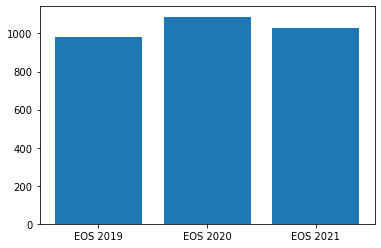

In [101]:
#Higher EOS points
plt.bar(['EOS 2019','EOS 2020','EOS 2021'],[maxeos2019,maxeos2020,maxeos2021])

plt.show()

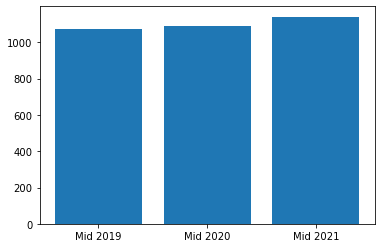

In [96]:
#Higher Mid points
plt.bar(['Mid 2019','Mid 2020','Mid 2021'],[maxmid2019,maxmid2020,maxmid2021])

plt.show()

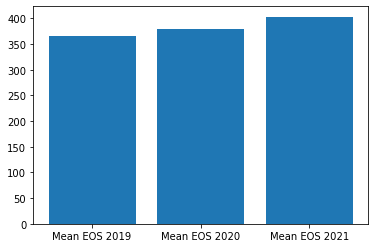

In [98]:
#Mean EOS points
plt.bar(['Mean EOS 2019','Mean EOS 2020','Mean EOS 2021'],[meaneos2019,meaneos2020,meaneos2021])

plt.show()

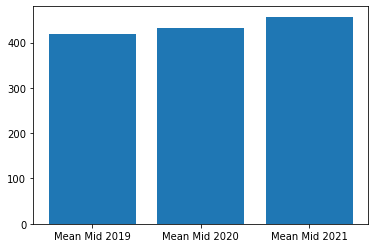

In [99]:
#Mean Mid points
plt.bar(['Mean Mid 2019','Mean Mid 2020','Mean Mid 2021'],[meanmid2019,meanmid2020,meanmid2021])

plt.show()

## Plots

## References

1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
2. https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

https://towardsdatascience.com/delete-row-from-pandas-dataframes-based-on-column-value-4b18bb1eb602

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html?highlight=query%20method

https://datatofish.com/string-to-integer-dataframe/

https://stackoverflow.com/questions/3675144/regex-error-nothing-to-repeat

https://stackoverflow.com/questions/25792619/what-is-correct-syntax-to-swap-column-values-for-selected-rows-in-a-pandas-data

https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

https://www.kite.com/python/answers/how-to-change-the-data-type-of-columns-in-a-pandas-dataframe-in-python

https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

https://datatofish.com/replace-nan-values-with-zeros/

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

https://www.geeksforgeeks.org/python-pandas-dataframe-mean/


***

## End